<a href="https://colab.research.google.com/github/kundanlal2001/Seoul_Bike_Prediction_Capstone2/blob/main/Capstone_Seoul_Bike_Sharing_Demand_Prediction_Regression_Kundan_Lal(Cohort_Hardeol)_%2CAbhijeet_Kulkarni%2CPankaj_Ganjare%2CAkshay_Auti_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Capstone Project 2 Title : Seoul Bike Sharing Demand Prediction (Using Regression)**

**Problem Description**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

**Data Description**
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Attribute Information:
Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [8]:
# Importing the Necessary libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
warnings.filterwarnings('ignore')

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2 Kundan Lal Seoul Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding =('ISO-8859-1'),low_memory=False) 

In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [17]:
#Finding Rows and columns of Dataset
df.shape

(8760, 14)

In [19]:
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [20]:
# checking null values 
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [21]:
# checking duplicate values
len(df[df.duplicated()])

0

In [22]:
# Printing number of unique values 
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [23]:
# Confirming how many null values are there or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [24]:
# finding All unique values of Seasons Column
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [25]:
# finding All unique values of Holiday Column
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [26]:
# finding All unique values of Functioning Day Column
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
# 1 Hot encoding Holiday Column
le1 = LabelEncoder()
Label1 = le1.fit_transform(df["Holiday"])

In [28]:
# 1 Hot encoding Functioning Day Column
le2 = LabelEncoder()
Label2 = le2.fit_transform(df["Functioning Day"])

In [29]:
le1.classes_

array(['Holiday', 'No Holiday'], dtype=object)

In [30]:
le2.classes_

array(['No', 'Yes'], dtype=object)

In [31]:
# Dropping Holiday Column into a duplicate data frame
df2=df.drop("Holiday", axis = 'columns')

In [32]:
# Dropping Functioning Day Column into a duplicate data frame
df2=df.drop("Functioning Day", axis = 'columns')

In [33]:
df2["Holiday"] = Label1

In [34]:
df2["Functioning Day"] = Label2

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   int64  
 13  Functioning Day            8760 non-null   int64

In [36]:
# Changing the Columns Name after removing special charecters so that Machine can read columns easily
df2.rename(columns= {'Rented Bike Count':'Rented_Bike_Count',
                    'Temperature(°C)':'Temperature',
                    'Humidity(%)':'Humidity',
                    'Wind speed (m/s)':'Wind_speed',
                    'Visibility (10m)':'Visibility',
                    'Dew point temperature(°C)':'Dew_point_temperature',
                    'Solar Radiation (MJ/m2)':'Solar_Radiation',
                    'Rainfall(mm)':'Rainfall',
                    'Snowfall (cm)':'Snowfall',
                    'Functioning Day':'Functioning_Day'},inplace=True)

In [37]:
se = pd.get_dummies(df2["Seasons"])

In [38]:
se

,Autumn,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8755,1,0,0,0
8756,1,0,0,0
8757,1,0,0,0
8758,1,0,0,0


In [39]:
df2.drop(['Seasons'],axis='columns', inplace = True)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Holiday                8760 non-null   int64  
 12  Functioning_Day        8760 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 889.8+ KB


In [ ]:
# Hot Encoding Seasons Column for 4 categorical variables
df2["Autumn"] = se["Autumn"].to_list()
df2["Spring"] = se["Spring"].to_list()
df2["Summer"] = se["Summer"].to_list()
df2["Winter"] = se["Winter"].to_list()

In [41]:
df2

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1


In [42]:
#After 1 Hot Encoding of all 3 columns and column type conversion ,Checking info of whole Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Holiday                8760 non-null   int64  
 12  Functioning_Day        8760 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 889.8+ KB


In [43]:
# Converting Date column to Date and time Format 
df2['Date'] = df2['Date'].apply(lambda x:dt.datetime.strptime(x, "%d/%m/%Y"))


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Holiday                8760 non-null   int64         
 12  Functioning_Day        8760 non-null   int64         
dtypes: 

In [45]:
#Breaking down the date column into day month and year
df2['day'] = df2['Date'].dt.day_name()
df2['month'] = df2['Date'].dt.month
df2['year'] = df2['Date'].dt.year
df2.drop(columns = 'Date', axis=1, inplace=True)

In [46]:
# Making the new numerical columns out of Weekdays_Weekend into the dataset
df2['weekdays_weekend'] = df2['day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [47]:
df2.drop(columns={'day','year'},axis=1,inplace=True)

In [48]:
df2.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,12,0


In [49]:
# Convert the dtypes of some object to category 
cols = ['Hour','month','weekdays_weekend']
for col in cols:
  df2[col] = df2[col].astype('category')

##***Exploratory Data Analysis (EDA)***

**Analyzing Catgorical Variables**

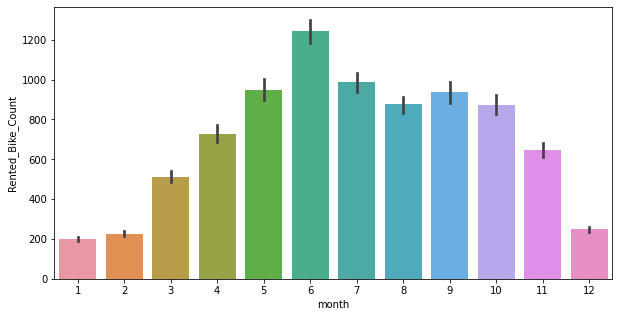

In [50]:
#Analysing on Month Basis
plt.figure(figsize=(10,5))
sns.barplot(data=df2,x='month',y='Rented_Bike_Count')

**From above graph we can analyze that from April to October the Demand is High of Rented bike count being June as Highest**

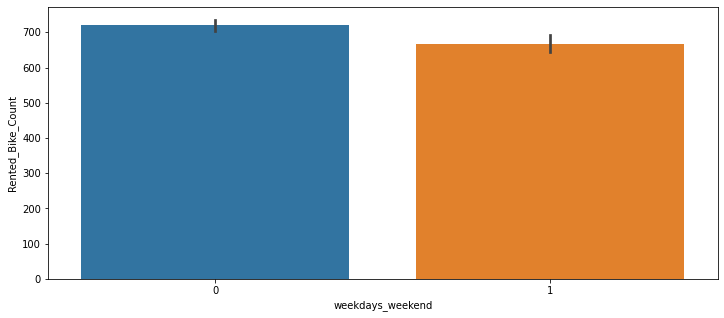

In [51]:
# Count of Rented Bike according to weekdays and Weekend
plt.figure(figsize = (12,5))
sns.barplot(data=df2, x='weekdays_weekend', y='Rented_Bike_Count')
plt.show()

**From Above Bar plot we can say that during weekdays number of renting of bike is higher than weekends , it can be inferred that may be during weekdays as the offices are working so the renting is higher .**

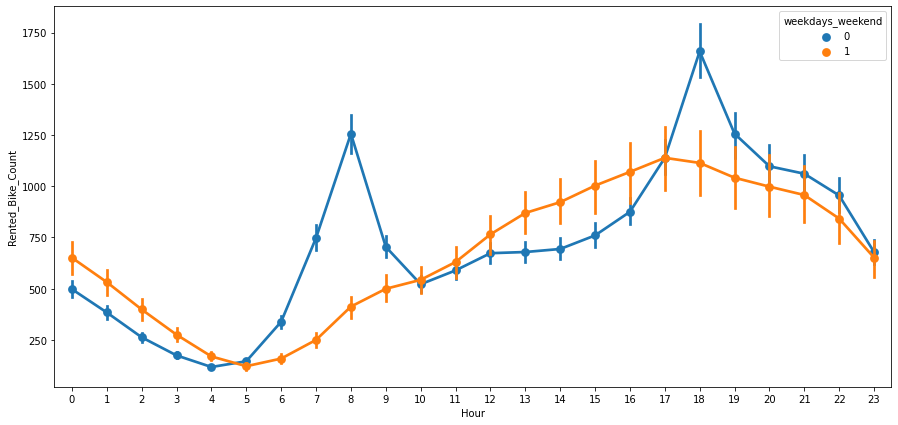

In [52]:
#Count of Rented Bike on Hour Basis
plt.figure(figsize = (15,7))
sns.pointplot(data=df2,x='Hour', y='Rented_Bike_Count',hue='weekdays_weekend')

* From the above point plot it can be analysed that the usage of rented bikes are more during weekdays than weekends.

* Also that during weekdays from 5 am to 10 am and evening from 4 pm to 8 pm the renting is highest .

* looking at orange line it can be said that during weekends the renting is very low during morning but as the evening comes closer gradually the rented numbers increases being maximum around 5 pm .It can be inferred that may be these must be getting used by people for leisure or family /personal use , non official, as its a weekend. 

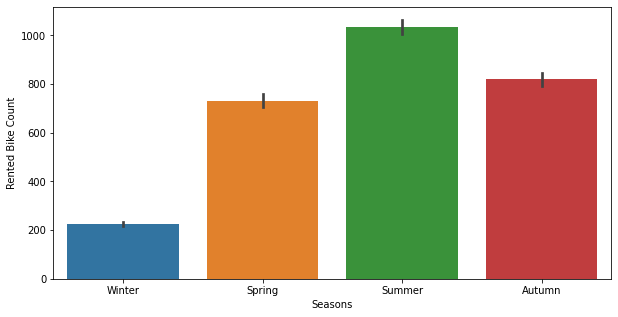

In [53]:
# Analysing no. of Bike rented column  with regards to Seasons column
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Seasons', y='Rented Bike Count')

* From Above barplot it can be seen easily that that Winters are the down season for renting , the number of rented bikes increases in Spring and Autumn and are nearly equal .

* Also the renting of Bikes is maximum in Summers approximately 30% higher than Sprint and Autumn . 

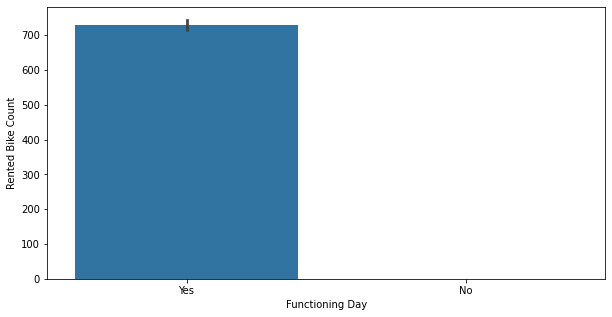

In [54]:
#Analysing Rented Bike count according to Functioning Day column
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Functioning Day', y='Rented Bike Count')

* It can be clearly seen that the renting of Bikes are done during functional hours of the days .

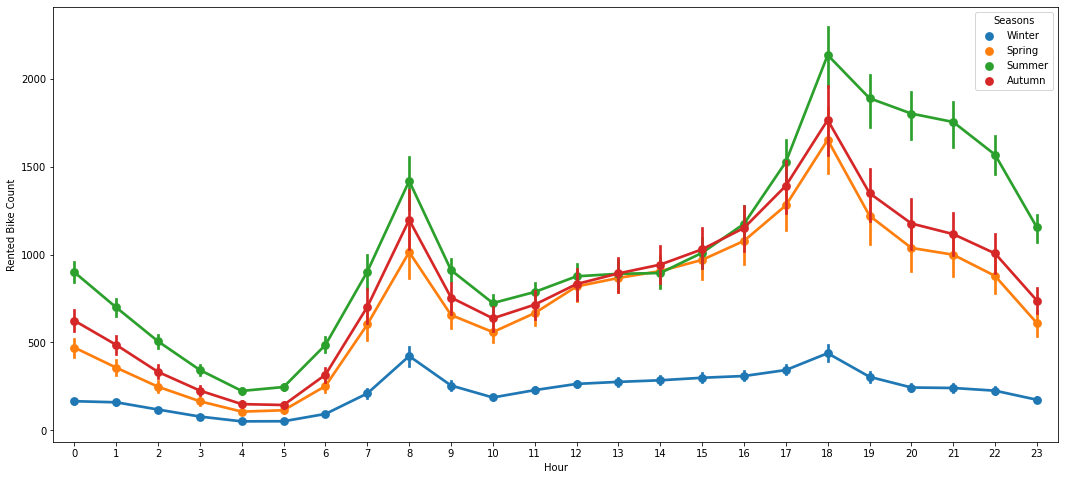

In [55]:
# Analysing the no. bike rented according to seasons and hour
plt.figure(figsize=(18,8))
sns.pointplot(data=df, x="Hour", y='Rented Bike Count', hue='Seasons')

* Above point plot shows that the trend of booking is similar for Summer , Autumn and Spring , which shows peak renting from 6 am to 9 am & from 4 Pm to 10 Pm
* The renting is lowest in Winter season.

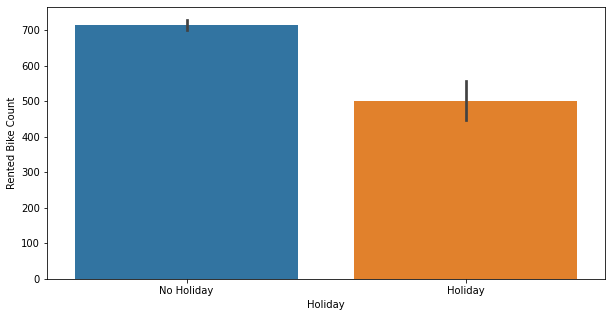

In [56]:
#Analysing according to Holiday
plt.figure(figsize = (10,5))
sns.barplot(data=df, x='Holiday', y='Rented Bike Count')

* It can be easily seen from above that the higher number of Renting is done on weekdays and lower on Holidays

## Analysis on Numerical Variables

In [57]:
numerical_variables = list(df.select_dtypes(['int64','float64']).columns)
numerical_variables


['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

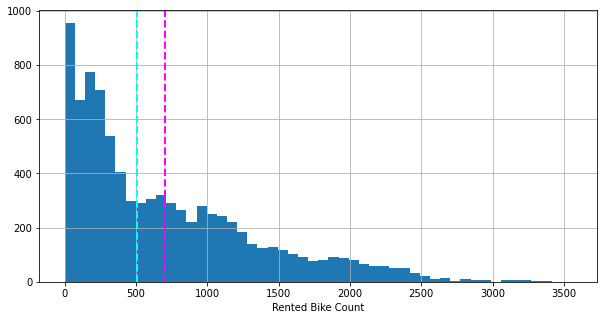

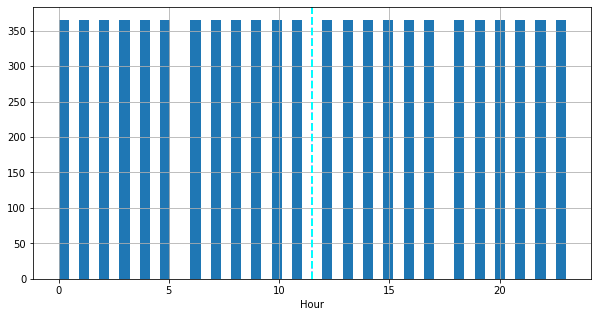

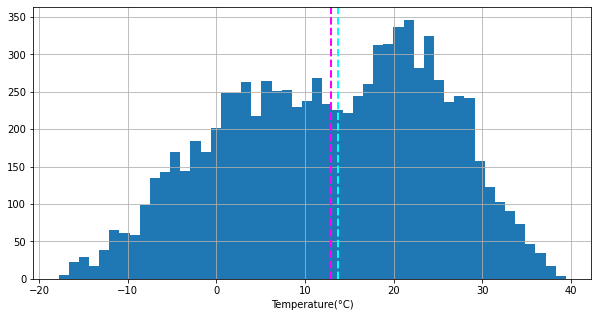

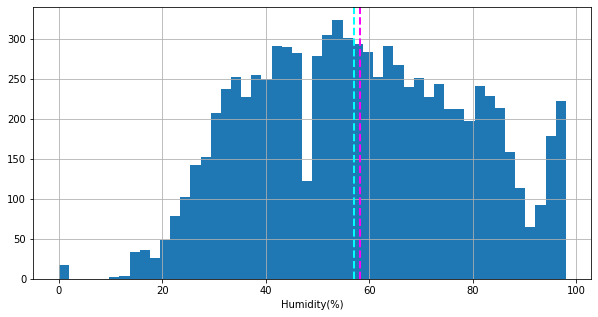

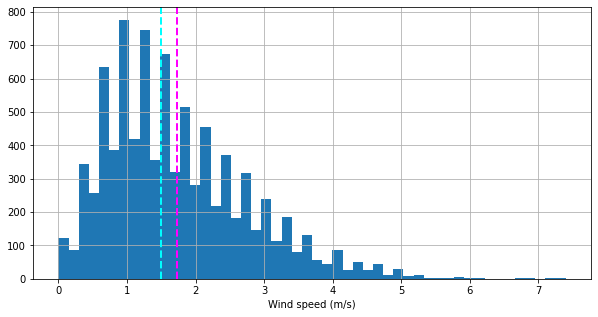

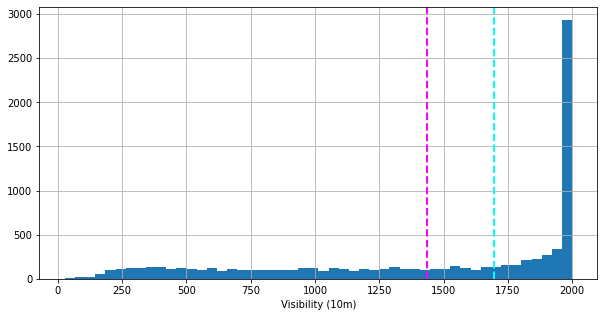

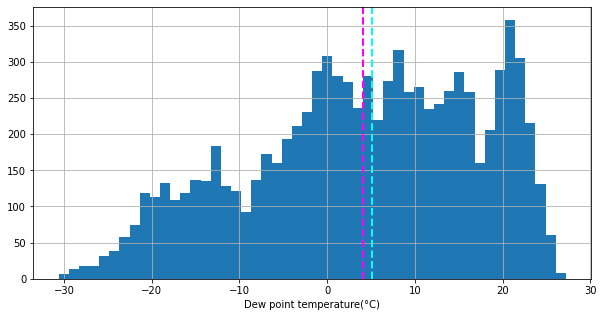

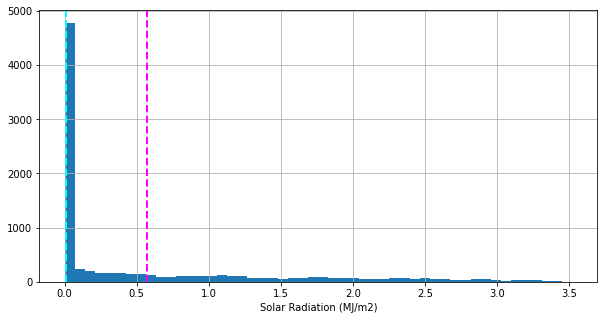

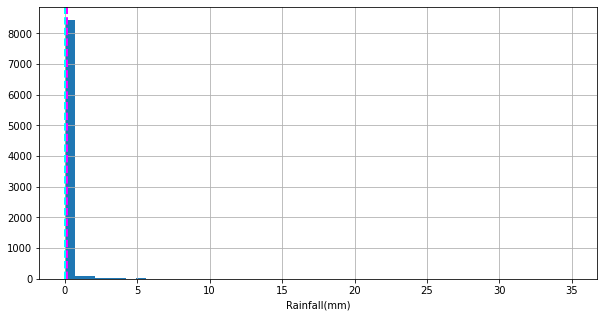

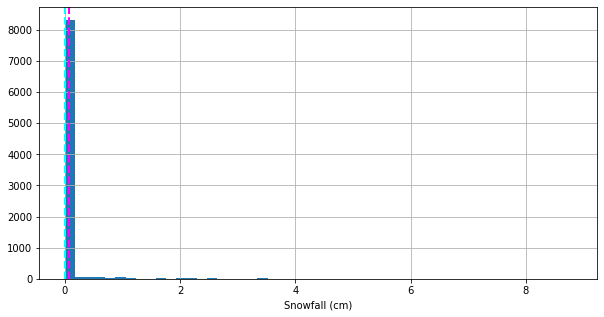

In [58]:
#Displaying displots to analyze the distribution of all numerical features
for col in numerical_variables:
  fig = plt.figure(figsize = (10,5))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.xlabel(col)
  plt.show()

##Analysing Rented_Bike_Count (Dependent Variable) Vs ('Temperature','Snowfall','Rainfall')**

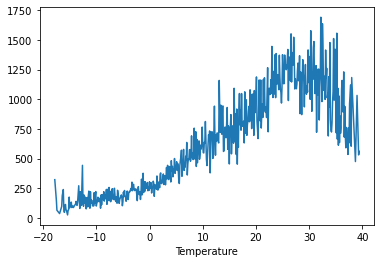

In [59]:
df2.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

* From Above it can be inferred that People prefer to rent a bike most , when the temperature is around 25-33 degree Centigrade.

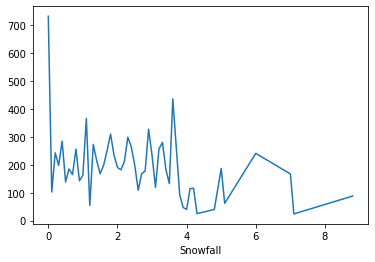

In [60]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df2.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()



* **It can be analysed that renting of the bikes are maximum when there is no Snow but it decreses drastically after 4 cms of snowfall.**


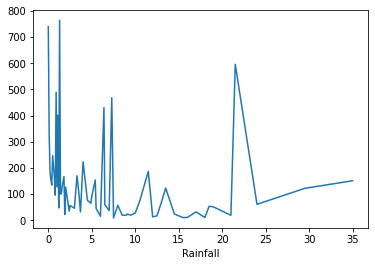

In [61]:
#Displaying the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df2.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

* **It can be seen than opposite of expected , there is no decrease in the renting of the bikes even if its raining , intermittently there are surges in the renting numbers .**

## Regression Plot to show their Linear Relationship with Target Variable

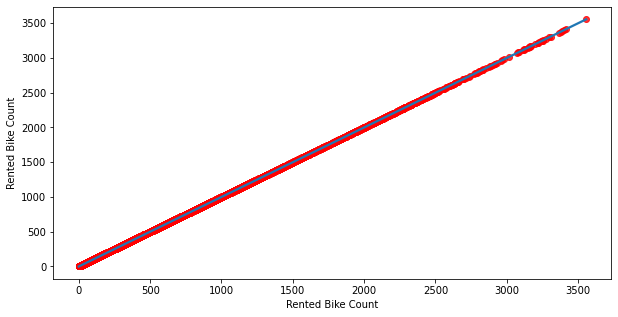

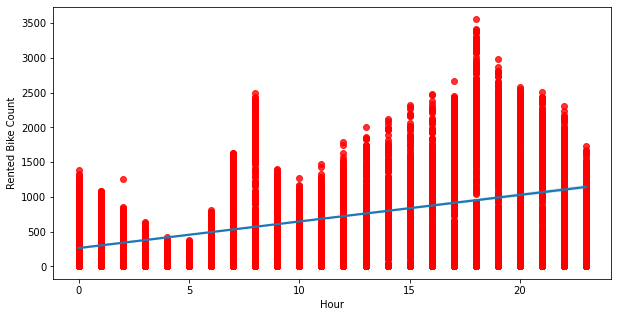

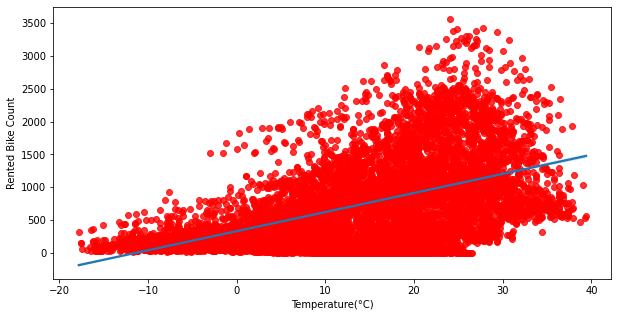

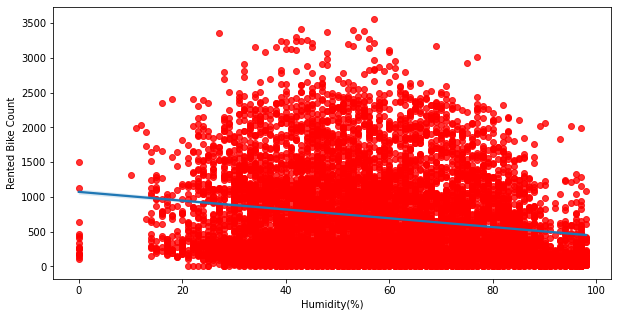

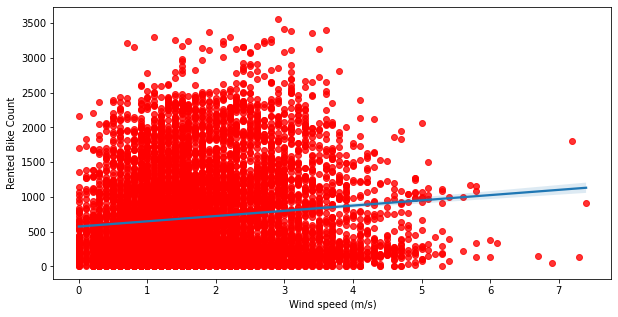

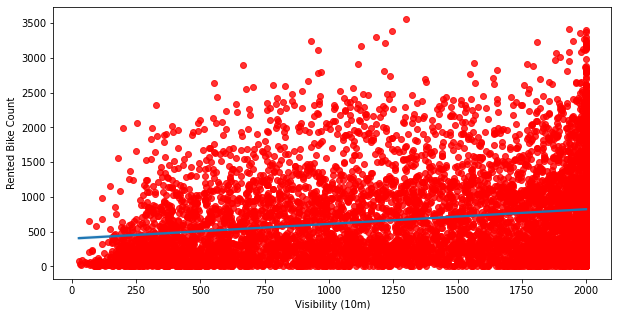

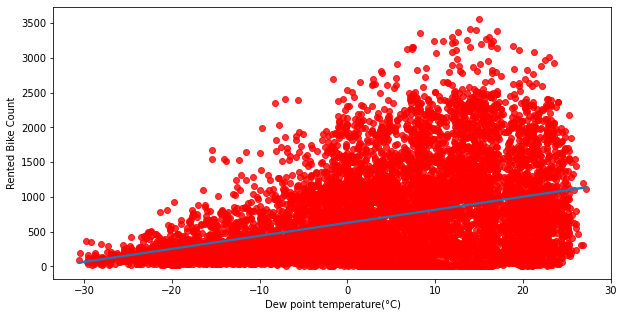

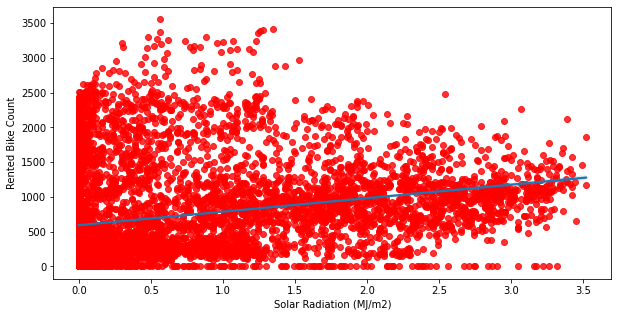

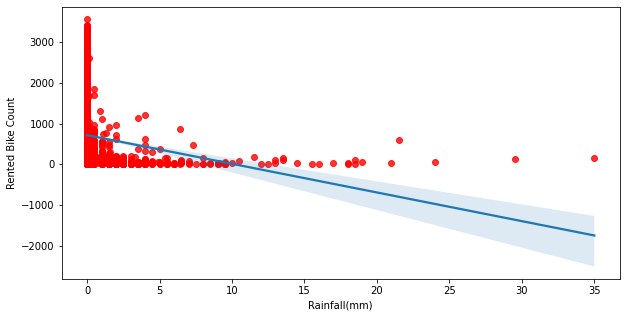

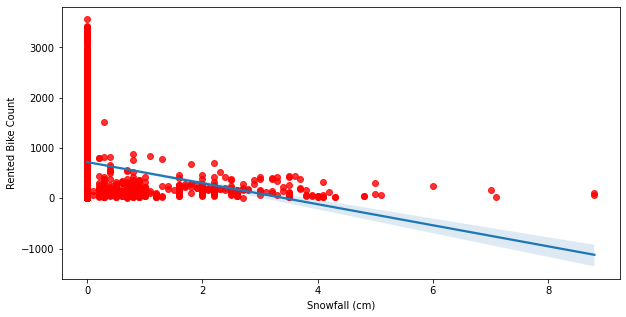

In [62]:
#printing the regression plot for all the numerical features
for col in numerical_variables:
  plt.figure(figsize=(10,5))
  sns.regplot(x=df[col], y='Rented Bike Count',data=df, scatter_kws ={'color':'red'})

From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable which means the rented bike count increases with increase of these features.
*   Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

## Normalise Dependent Variable Column

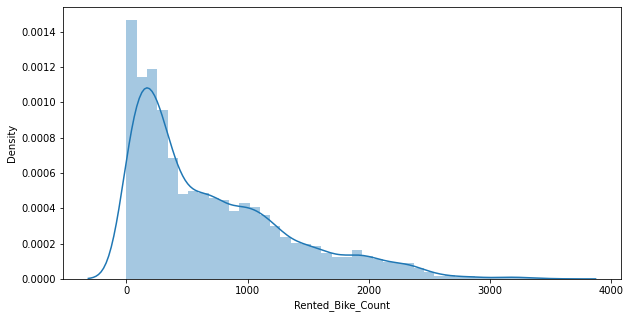

In [63]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,5))
sns.distplot(df2['Rented_Bike_Count'],hist=True)
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
plt.show()

*   The above graph show that the dependent variable has moderate right skewness. Since the assumption is that the dependent variable has to be normal. So we have to perform some operation to make the above plot normal with the help of normalization

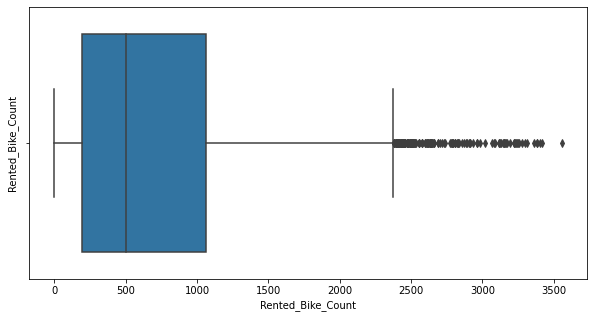

In [64]:
#Boxplot to chech the outliers 
plt.figure(figsize=(10,5))
sns.boxplot(df2['Rented_Bike_Count'])
plt.ylabel('Rented_Bike_Count')
plt.show()

The above boxplot shows that there are outliers present in dependent variable column Rented Bike count


## Applying Normalization

Text(0, 0.5, 'Density')

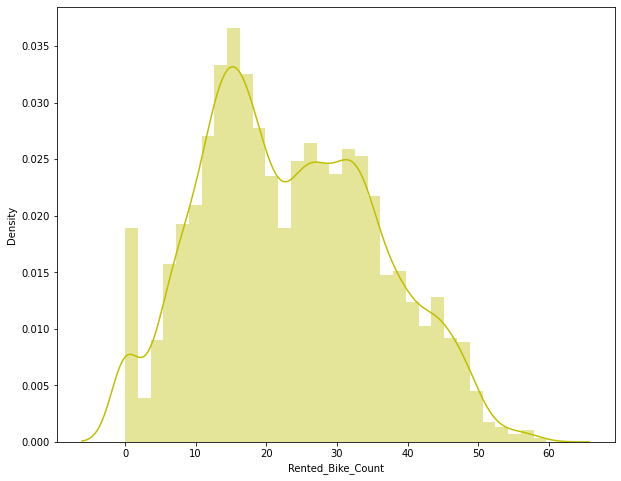

In [65]:
#Applyng Normalization for Rented_Bike_Count to improve the skewness 
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df2['Rented_Bike_Count']),color='y')
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')

*   After applying Square root for moderate right Skewness to make it normal, here we get almost normal distribution curve

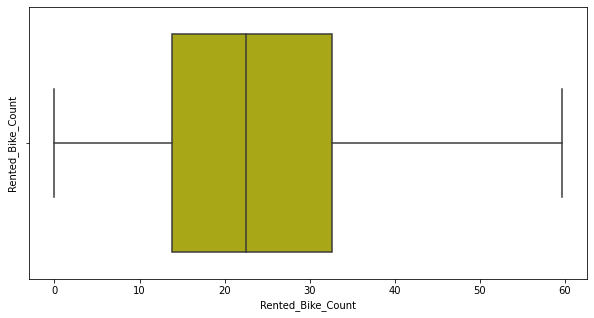

In [66]:
#Removing the outliers from the dependent variable column
plt.figure(figsize=(10,5))
sns.boxplot(np.sqrt(df2['Rented_Bike_Count']),color='y')
plt.ylabel('Rented_Bike_Count')
plt.show()

*  From the above boxplot we can see that we have removed the outliers present in the dependent variable column

##Normalizing the independent variable

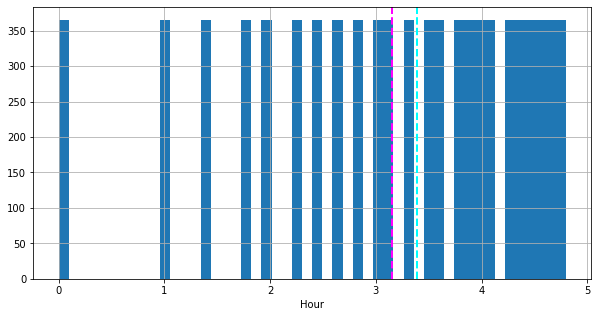

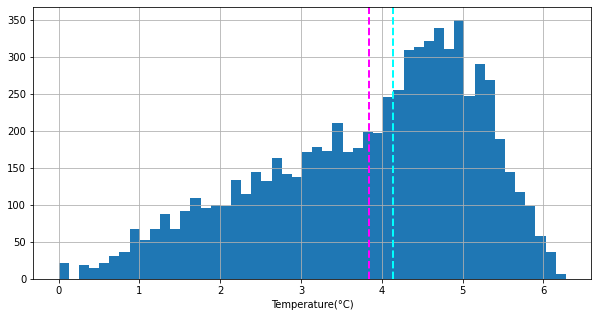

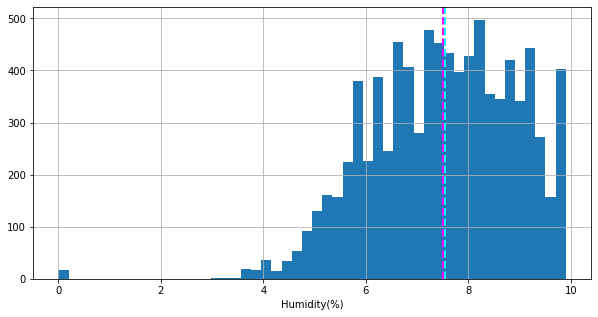

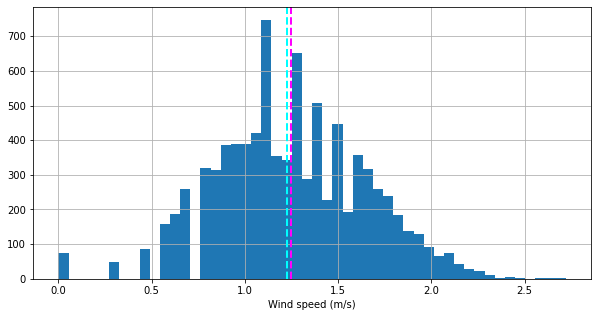

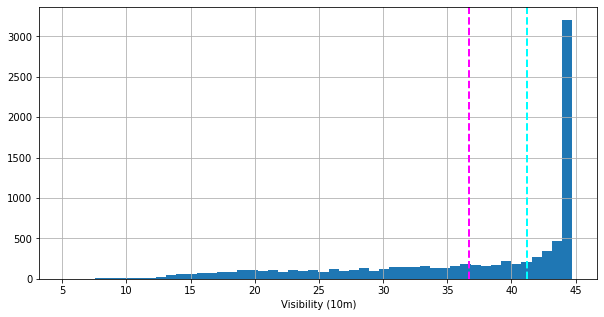

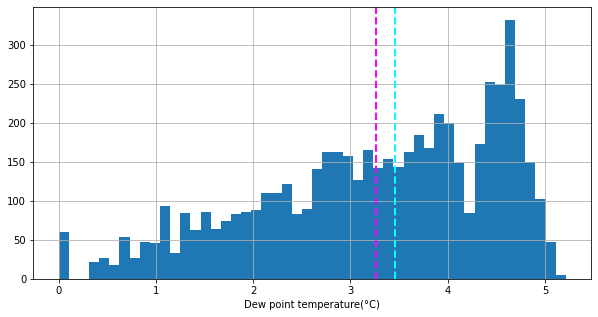

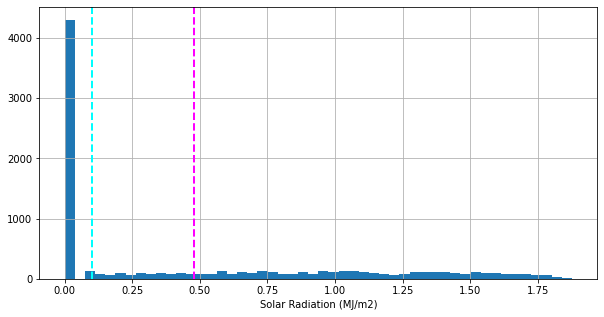

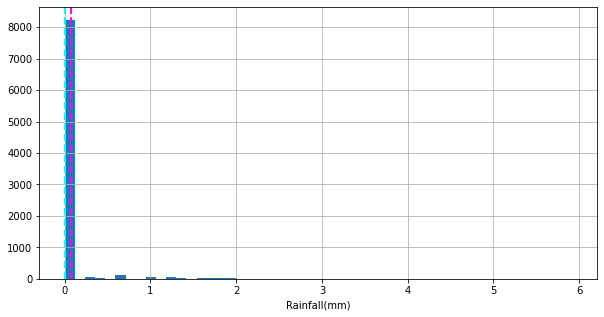

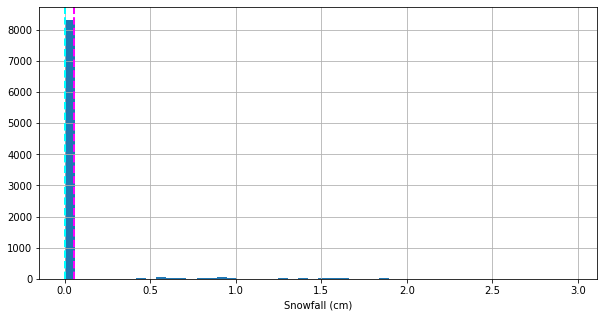

In [67]:
#Normalizing the independent variable which is not in normal distribution 
for col in numerical_variables[1:]:
  fig = plt.figure(figsize = (10,5))
  ax = fig.gca()
  feature = np.sqrt(df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.xlabel(col)
  plt.show()

## Checking Multi colinearity amongst all Independent Varaibles 

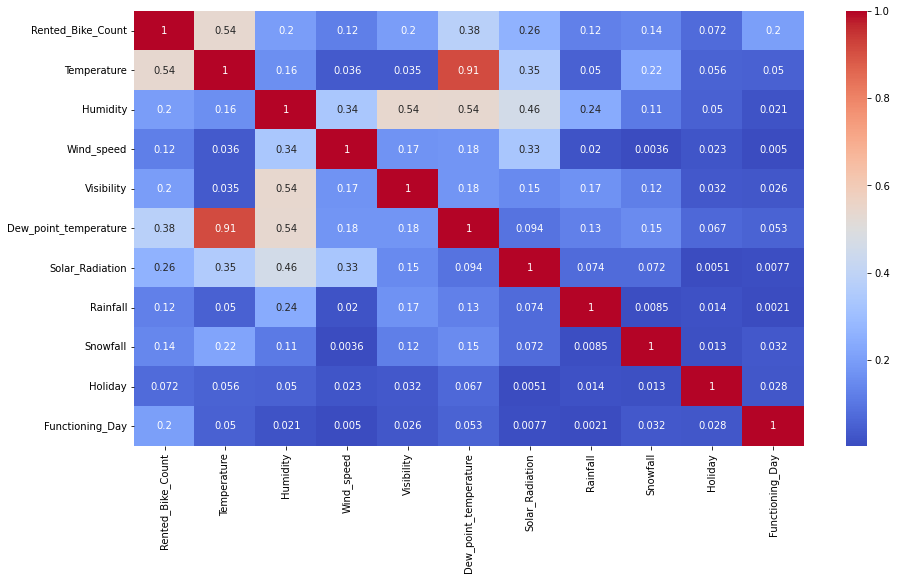

In [68]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df2.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [69]:
# Deleting Dew point temperature column as it has very high multicolenearity 
df2.drop(columns='Dew_point_temperature',axis=1,inplace=True)

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Holiday            8760 non-null   int64   
 10  Functioning_Day    8760 non-null   int64   
 11  month              8760 non-null   category
 12  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(5)
memory usage: 711.4 KB


In [71]:
#converting Hour and Month to int column to run regression on same
lst = ['Hour','month']
for col in lst:
  df2[col] = df2[col].astype('int')


In [72]:
# checked Hour and Month columns are converted to Int type for running regression on same
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   int64   
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Holiday            8760 non-null   int64   
 10  Functioning_Day    8760 non-null   int64   
 11  month              8760 non-null   int64   
 12  weekdays_weekend   8760 non-null   category
dtypes: category(1), float64(5), int64(7)
memory usage: 830.1 KB


## Model Training

In [73]:
# Assign the value of X and y
X = df2.iloc[:,1:]
y = df2.iloc[:,0]

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Hour              8760 non-null   int64   
 1   Temperature       8760 non-null   float64 
 2   Humidity          8760 non-null   int64   
 3   Wind_speed        8760 non-null   float64 
 4   Visibility        8760 non-null   int64   
 5   Solar_Radiation   8760 non-null   float64 
 6   Rainfall          8760 non-null   float64 
 7   Snowfall          8760 non-null   float64 
 8   Holiday           8760 non-null   int64   
 9   Functioning_Day   8760 non-null   int64   
 10  month             8760 non-null   int64   
 11  weekdays_weekend  8760 non-null   category
dtypes: category(1), float64(5), int64(6)
memory usage: 761.6 KB


In [75]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented_Bike_Count, dtype: int64

In [76]:
# split train and test data into 75% and 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 20)


In [77]:
X_train.shape , X_test.shape

((6570, 12), (2190, 12))

## Using Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model1 = reg.fit(X_train, y_train)

In [79]:
# Chech the Score
model1.score(X_train, y_train)

0.5326269758147548

In [80]:
#Chech the coefficient
model1.coef_

array([ 2.68143074e+01,  3.13966004e+01, -7.58060268e+00,  1.19943332e+01,
        2.42049494e-02, -8.45327598e+01, -5.75735231e+01,  6.76011875e-02,
        1.68423158e+02,  8.64258331e+02,  1.38439106e+01, -8.38726396e+01])

In [81]:
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)

In [82]:
y_pred_test

array([ 547.83731797, 1172.28402475, 1409.45051661, ...,  961.33908873,
       1484.76386759,  224.51779573])

In [83]:
y_test

3252    1105
4277     247
7216    1636
2491    1478
7823     916
        ... 
8550     332
5637    1994
5528    1993
6087     694
3054     108
Name: Rented_Bike_Count, Length: 2190, dtype: int64

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Calculate MSE
MSE_lr = mean_squared_error((y_train),(y_pred_train))
print('MSE:', MSE_lr)

#Calculate RMSE
RMSE_lr = np.sqrt(MSE_lr)
print('RMSE:', RMSE_lr)

#Calculate R2_score
from sklearn.metrics import r2_score
R2_lr = r2_score(y_train, y_pred_train)
print('R2_Score:', R2_lr)


MSE: 196430.87790912393
RMSE: 443.2052322673142
R2_Score: 0.5326269758147548


In [85]:
from sklearn.metrics import mean_squared_error
#CAlculate MSE
MSE_lr = mean_squared_error(y_test, y_pred_test)
print("MSE:", MSE_lr)

#Calculate RMSE
RMSE_lr = np.sqrt(MSE_lr)
print('RMSE:', RMSE_lr)

#Calculate R2_score
R2_score = r2_score(y_test, y_pred_test)
print('R2_score:', R2_score)

MSE: 188922.5526255858
RMSE: 434.6522203159508
R2_score: 0.5311954277819636


## Showing Heteroscadacity here






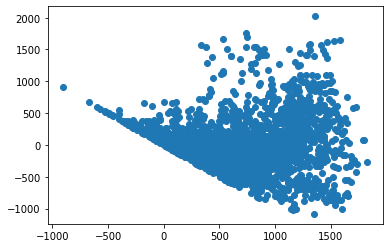

In [86]:
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

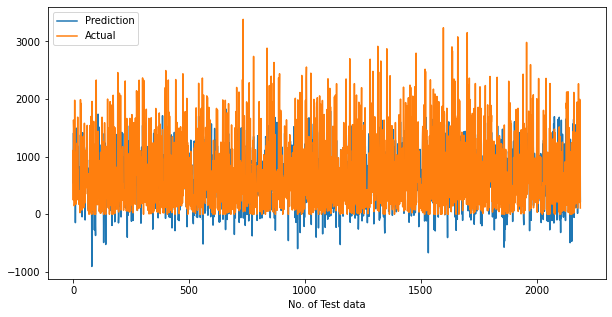

In [87]:
plt.figure(figsize=(10,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(['Prediction', 'Actual'])
plt.xlabel('No. of Test data')
plt.show()

## Using Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=9,
                           max_leaf_nodes=100)

In [89]:
dr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=9,
                      max_leaf_nodes=100)

In [90]:
y_pred_train_dt = dr.predict(X_train)
y_pred_test_dt = dr.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error
print('Model score:', dr.score(X_train, y_train))

#Calculate MSE
MSE_dt = mean_squared_error(y_train, y_pred_train_dt)
print('MSE:', MSE_dt)

#Calculate RMSE
RMSE_dt = np.sqrt(MSE_dt)
print('RMSE:', RMSE_dt)

#Calculate R2_score
from sklearn.metrics import r2_score
R2_score = r2_score(y_train, y_pred_train_dt)
print('R2_score:', R2_score)

Model score: 0.7939503162954357
MSE: 86600.03502243773
RMSE: 294.2788388967812
R2_score: 0.7939503162954357


In [92]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_dt= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE_dt)

#calculate RMSE
RMSE_dt=np.sqrt(MSE_dt)
print("RMSE :",RMSE_dt)

#Calculate R2_score
R2_score_dt= r2_score((y_test), (y_pred_test_dt))
print("R2 :", R2_score_dt)

MSE : 104441.57910477981
RMSE : 323.17422407237217
R2 : 0.7408319486820152


## Showing Heteroscadacity here

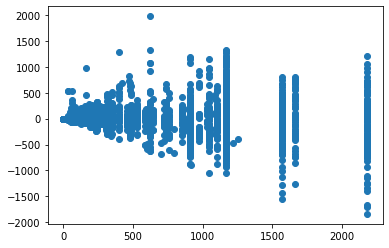

In [93]:
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

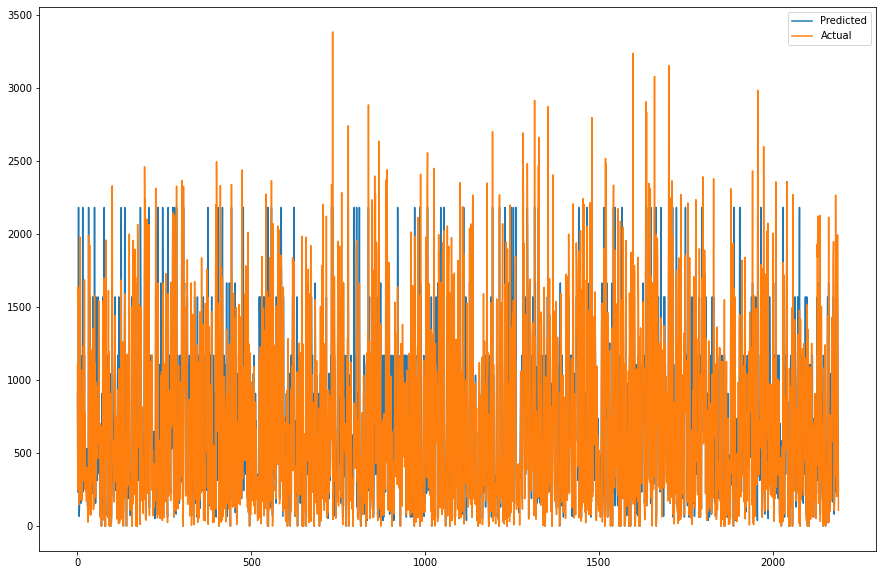

In [94]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
# Making predictions on train and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error
print('Model Score:', rf.score(X_train, y_train))

#Calculate MSE
MSE_rf = mean_squared_error(y_train, y_pred_train_rf)
print('MSE:', MSE_rf)

# Calculate RMSE
RMSE_rf = np.sqrt(MSE_rf)
print('RMSE:', RMSE_rf)

# Calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE_rf)

#Calculate R2_Score
from sklearn.metrics import r2_score
r2_rf = r2_score(y_train, y_pred_train_rf)
print('R2_score:', r2_rf)

Model Score: 0.9896591992585646
MSE: 4346.105707458143
RMSE: 65.92500062539358
MAE : 38.56788127853881
R2_score: 0.9896591992585646


##Looks like our r2 score value is 0.99 that means our model is able to capture most of the data variance and is performing really well

In [98]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf)


from sklearn.metrics import r2_score
#calculate R2_score
r2_rf= r2_score((y_test), (y_pred_test_rf))
print("R2_Score :",r2_rf)

MSE : 28950.70657543379
RMSE : 170.14907162671736
MAE : 100.69470319634705
R2_Score : 0.9281598548035496


##The r2_score for the test set is 0.93. This means our linear model is performing well on the data.

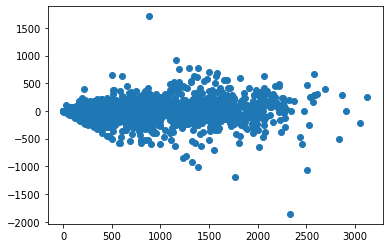

In [99]:
### Heteroscadacity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

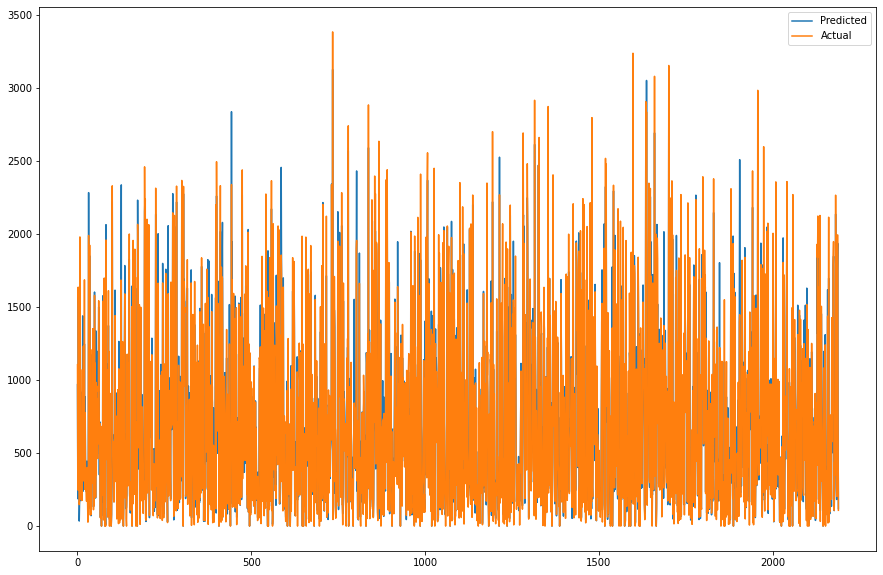

In [100]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Using ELASTIC NET REGRESSION

In [101]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [110]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)


ElasticNet(alpha=0.1)

In [111]:
#check the score
elasticnet.score(X_train, y_train)

0.5102787506735456

In [105]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)

MSE : 205823.54983718653
RMSE : 453.67780399440585
MAE : 336.4833250758088
R2 : 0.5102787506735456


##Looks like our r2 score value is 0.52 that means our model is not able to capture most of the data variance.

In [107]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)

MSE : 195541.38955674006
RMSE : 442.20062138891217
MAE : 329.50589440402507
R2 : 0.514771020145252


##The r2_score for the test set is 0.53. This means our linear model is not performing well on the data. 

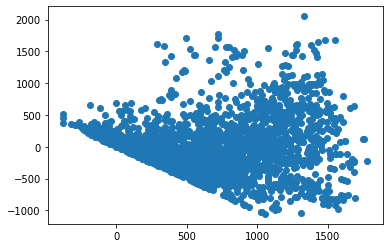

In [108]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

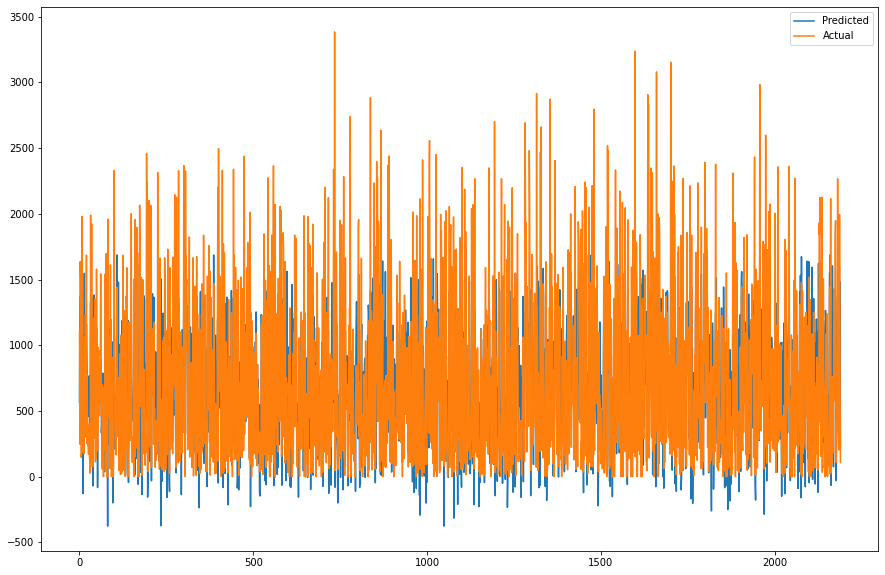

In [112]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Conclusion and Recommendations

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

We implemented 4 Machine Learning algorithm LinearRegression, Decision Tree, RandomForest, ElasticNet.

Random Forest Regressor gives highest R2 Score of 99% for training set and 93% for testing set

Elastic net gives the lowest R2 Score of 52% for training set and 52% for testing set.

If there will be on an average of 1800 -2000 number of Bikes in Seoul , then their 99% of demand , can be met with, considering any season LIke summer , winter , Autumn , Spring or any weather like rain or snowfall etc.
